# Particle Swarm Optimization
## Overview
- A population of particles that can move in a multidimensional space.
- A fitness function that evaluates the quality of each particle's position.
- A velocity update rule that incorporates the particle's personal best position and global position with added noise.
- A set of params that control the inertia, cognitive, and social components of the velocity update rule.
## Uses
- Finding the solution to an optimization problem.
- Random initalization of the particles' positions and velocities -> no priors.
- Particle compares its personal best -> locality, to the global best -> generalization.
- Updates a position that balances exploration and exploitation.
- Terminates when criterion is met (fitness value or max iterations).

### Examples in this notebook.

FTG --- A.W.

In [ ]:
import numpy as np
# === fitness function ===
def fitness(x):
  return np.sum(100.0 * (x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0)

# === params ====
num_particles = 100
num_dimensions = 10
max_iter = 1000
w = 0.9 # inertia weight.
c1 = 2 # Cognitive coefficient
c2 = 2 # Social coefficient
lower_bound = -5 # Lower bound of the search space.
upper_bound = 5 # Upper bound of the search space.

# === initalize positions and velocities ====
positions = np.random.uniform(lower_bound, upper_bound, (num_particles, num_dimensions))
velocities = np.random.uniform(-1, 1, (num_particles, num_dimensions))

# === initalize goals =======
personal_best_positions = positions.copy()
personal_best_fitness = np.array([fitness(x) for x in personal_best_positions])
global_best_position = personal_best_positions[np.argmin(personal_best_fitness)]
global_best_fitness = np.min(personal_best_fitness)

# === Main loop of the PSO ====
for i in range(max_iter):
  for j in range(num_particles):
    r1 = np.random.rand()
    r2 = np.random.rand()
    # update velocities.
    velocities[j] = w * velocities[j] + c1 * r1 * (personal_best_positions[j] - positions[j]) + c2 * r2 * (global_best_position - positions[j])
    # update position
    positions[j] = positions[j] + velocities[j]
    # apply boundary conditions
    positions[j] = np.clip(positions[j], lower_bound, upper_bound)

    fitness_val = fitness(positions[j])
    if fitness_val < personal_best_fitness[j]:
      personal_best_positions[j] = positions[j].copy()
      personal_best_fitness[j] = fitness_val
      if fitness_val < global_best_fitness:
        global_best_position = positions[j].copy()
        global_best_fitness = fitness_val

print("Global best position: ", global_best_position)
print("Global best fitness: ", global_best_fitness)

Global best position:  [ 8.27451681e-01  6.81564668e-01  4.55225689e-01  1.97723596e-01
  5.50222615e-02  7.59199761e-03  4.02807588e-04 -2.60865465e-03
  9.58676533e-03  1.89776042e-02]
Global best fitness:  6.026447543895279


Global best position: after 200 iterations [1.00319653 1.0065475 ]
Global best fitness: after 200 iterations 1.229769073144038e-05
The optimal value is (1.0, 1.0) when a=1 and b=100


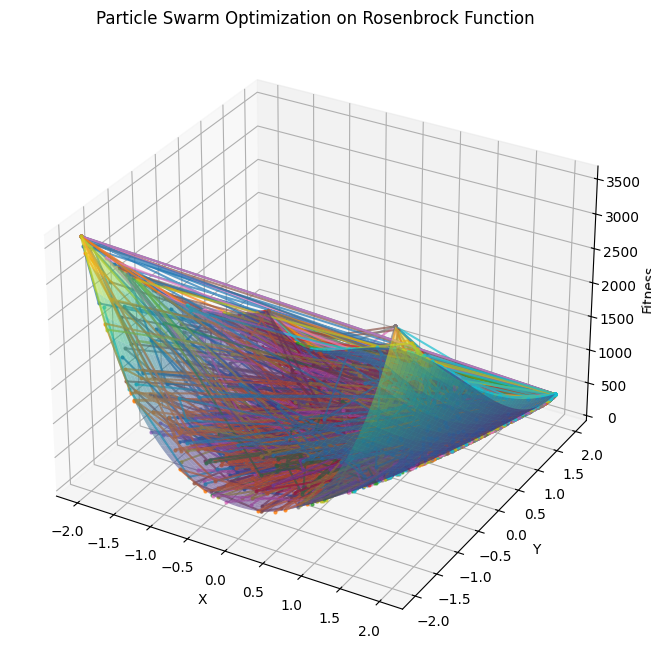

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Redefine fitness function for 2 dimensions for visualization
def fitness_2d(x, y):
  return (1 - x)**2 + 100 * (y - x**2)**2

# === params ====
num_particles = 50
num_dimensions = 2  # We are visualizing in 2D
max_iter = 200
w = 0.9 # inertia weight.
c1 = 2 # Cognitive coefficient
c2 = 2 # Social coefficient
lower_bound = -2 # Lower bound of the search space.
upper_bound = 2 # Upper bound of the search space.

# === initalize positions and velocities ====
positions = np.random.uniform(lower_bound, upper_bound, (num_particles, num_dimensions))
velocities = np.random.uniform(-1, 1, (num_particles, num_dimensions))

# === initalize goals =======
personal_best_positions = positions.copy()
personal_best_fitness = np.array([fitness_2d(x[0], x[1]) for x in personal_best_positions])
global_best_position = personal_best_positions[np.argmin(personal_best_fitness)]
global_best_fitness = np.min(personal_best_fitness)

# === Main loop of the PSO ====
# Store positions for visualization
all_positions = [positions.copy()]

for i in range(max_iter):
  for j in range(num_particles):
    r1 = np.random.rand()
    r2 = np.random.rand()
    # update velocities.
    velocities[j] = w * velocities[j] + c1 * r1 * (personal_best_positions[j] - positions[j]) + c2 * r2 * (global_best_position - positions[j])
    # update position
    positions[j] = positions[j] + velocities[j]
    # apply boundary conditions
    positions[j] = np.clip(positions[j], lower_bound, upper_bound)

    fitness_val = fitness_2d(positions[j, 0], positions[j, 1])
    if fitness_val < personal_best_fitness[j]:
      personal_best_positions[j] = positions[j].copy()
      personal_best_fitness[j] = fitness_val
      if fitness_val < global_best_fitness:
        global_best_position = positions[j].copy()
        global_best_fitness = fitness_val

  all_positions.append(positions.copy())


print(f"Global best position: after {max_iter} iterations", global_best_position)
print(f"Global best fitness: after {max_iter} iterations", global_best_fitness)
print("The optimal value is (1.0, 1.0) when a=1 and b=100")

# === Visualization ===
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid for the surface plot
x_vals = np.linspace(lower_bound, upper_bound, 100)
y_vals = np.linspace(lower_bound, upper_bound, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = fitness_2d(X, Y)

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)

# Plot the particle paths
for i in range(num_particles):
    particle_path = np.array([pos[i] for pos in all_positions])
    particle_fitness = np.array([fitness_2d(pos[0], pos[1]) for pos in particle_path])
    ax.plot(particle_path[:, 0], particle_path[:, 1], particle_fitness, marker='o', markersize=2, linestyle='-', alpha=0.7)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Fitness')
ax.set_title('Particle Swarm Optimization on Rosenbrock Function ')
plt.show()
